In [8]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [9]:
from google.colab import files
uploaded = files.upload()
import json

# Load the intents.json file
with open('mental_health_dataset.json', 'r') as file:
    data = json.load(file)

# Check the structure of the dataset
print(json.dumps(data, indent=2))

Saving mental_health_dataset.json to mental_health_dataset.json
{
  "intents": [
    {
      "tag": "greeting",
      "patterns": [
        "Hi",
        "Hey",
        "Is anyone there?",
        "Hi there",
        "Hello",
        "Hey there",
        "Howdy",
        "Hola",
        "Bonjour",
        "Konnichiwa",
        "Guten tag",
        "Ola"
      ],
      "responses": [
        "Hello there. Tell me how are you feeling today?",
        "Hi there. What brings you here today?",
        "Hi there. How are you feeling today?",
        "Great to see you. How do you feel currently?",
        "Hello there. Glad to see you're back. What's going on in your world right now?"
      ]
    },
    {
      "tag": "morning",
      "patterns": [
        "Good morning"
      ],
      "responses": [
        "Good morning. I hope you had a good night's sleep. How are you feeling today? "
      ]
    },
    {
      "tag": "afternoon",
      "patterns": [
        "Good afternoon"
      ],
     

In [ ]:
# Extract texts and labels
texts = []
labels = []
for intent in data['intents']:
    for pattern in intent['patterns']:
        texts.append(pattern)
        labels.append(intent['tag'])

<ipython-input-5-29af838cd62a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


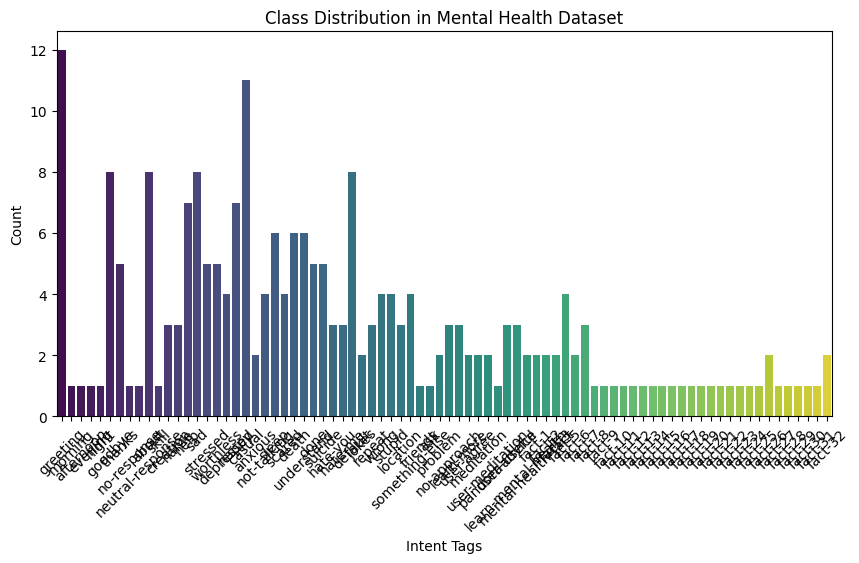

In [ ]:
# Exploratory Data Analysis (EDA)
class_counts = Counter(labels)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.xlabel("Intent Tags")
plt.ylabel("Count")
plt.title("Class Distribution in Mental Health Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(encoded_labels))

In [ ]:
# Class Balancing (Oversampling)
class_counts = np.bincount(encoded_labels)
max_count = max(class_counts)
balanced_texts, balanced_labels = [], []
for text, label in zip(texts, encoded_labels):
    n_samples = max_count // class_counts[label]  # Oversampling ratio
    for _ in range(n_samples):
        balanced_texts.append(text)
        balanced_labels.append(label)

In [ ]:
# Convert to arrays
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_texts).toarray()
y = to_categorical(balanced_labels, num_classes=num_classes)

# Build Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=20, batch_size=8, verbose=1)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0876 - loss: 4.1226
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 1.7438
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7293 - loss: 1.0299
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.7007
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8104 - loss: 0.7053
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.5557
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.6737
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.6738
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.5365
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.4711
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.5081
Epoch 12/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Split your data into training and testing sets using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

val_pred = model.predict(X_test)
val_pred_classes = np.argmax(val_pred, axis=1)
val_test_classes = np.argmax(y_test, axis=1)  # Assuming 'y_test' was also not defined

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("Validation Accuracy:", accuracy_score(val_test_classes, val_pred_classes))
print("Validation Classification Report:\n", classification_report(val_test_classes, val_pred_classes))


Validation Accuracy: 0.9945945945945946
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         4
      

In [ ]:
# Save model and vectorizer
model.save("chatbot_model.h5")
joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# Download 'punkt_tab'
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files


Saving chatbot_model.h5 to chatbot_model.h5
Saving label_encoder.pkl to label_encoder.pkl
Saving vectorizer.pkl to vectorizer.pkl


In [3]:
import os
print(os.listdir())  # List all files in the current directory


['.config', 'chatbot_model.h5', 'label_encoder.pkl', 'vectorizer.pkl', 'sample_data']


In [4]:
import tensorflow as tf
import joblib
import numpy as np

# Load the trained model, vectorizer, and label encoder
model = tf.keras.models.load_model("chatbot_model.h5")
vectorizer = joblib.load("vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

print("Model and vectorizer loaded successfully!")


Model and vectorizer loaded successfully!


In [ ]:
def chatbot_response(user_input):
    # Convert input text to a vector
    user_vector = vectorizer.transform([user_input])

    # Predict the intent using the trained model
    prediction = model.predict(user_vector)

    # Get the most probable intent
    intent_index = np.argmax(prediction)

    # Convert intent index back to label
    predicted_intent = label_encoder.inverse_transform([intent_index])[0]

    # Step 5: Find the response from the dataset
    for intent in data["intents"]:
        if intent["tag"] == predicted_intent:
            return np.random.choice(intent["responses"])

    return "Sorry, I didn't understand that."

# Step 6: Interactive chatbot loop
while True:
    user_message = input("You: ")
    if user_message.lower() in ["exit", "quit", "bye"]:
        print("Chatbot: Goodbye! 👋")
        break
    response = chatbot_response(user_message)
    print(f"Chatbot: {response}")

You: whats the cause of mental health problems
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Chatbot: We can all suffer from mental health challenges, but developing our wellbeing, resilience, and seeking help early can help prevent challenges becoming serious.
You: What should I do if I know someone who appears to have the symptoms of a mental disorder?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Chatbot: Although Pandora cannot substitute for professional advice, we encourage those with symptoms to talk to their friends and family members and seek the counsel of a mental health professional. The sooner the mental health condition is identified and treated, the sooner they can get on the path to recovery. If you know someone who is having problems, don't assume that the issue will resolve itself. Let them know that you care about them, and that there are treatment options available that will help them heal. Speak with a mental health professional or counselor if you think your friend or family me